In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

In [11]:
data = pd.read_csv('Spotify-2000.csv')
data.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [12]:
data.shape

(1994, 15)

In [13]:
data = data.drop("Index", axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length                  1994 non-null   object
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 218.2+ KB


# EDA

In [14]:
data.corr()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
Year,1.000000,0.012570,0.147235,0.077493,0.343764,0.019017,-0.166163,-0.132946,0.054097,-0.158962
Beats Per Minute (BPM),0.012570,1.000000,0.156644,-0.140602,0.092927,0.016256,0.059653,-0.122472,0.085598,-0.003181
Energy,0.147235,0.156644,1.000000,0.139616,0.735711,0.174118,0.405175,-0.665156,0.205865,0.103393
Danceability,0.077493,-0.140602,0.139616,1.000000,0.044235,-0.103063,0.514564,-0.135769,0.125229,0.144344
Loudness (dB),0.343764,0.092927,0.735711,0.044235,1.000000,0.098257,0.147041,-0.451635,0.125090,0.165527
Liveness,0.019017,0.016256,0.174118,-0.103063,0.098257,1.000000,0.050667,-0.046206,0.092594,-0.111978
Valence,-0.166163,0.059653,0.405175,0.514564,0.147041,0.050667,1.000000,-0.239729,0.107102,0.095911
Acousticness,-0.132946,-0.122472,-0.665156,-0.135769,-0.451635,-0.046206,-0.239729,1.000000,-0.098256,-0.087604
Speechiness,0.054097,0.085598,0.205865,0.125229,0.125090,0.092594,0.107102,-0.098256,1.000000,0.111689
Popularity,-0.158962,-0.003181,0.103393,0.144344,0.165527,-0.111978,0.095911,-0.087604,0.111689,1.000000


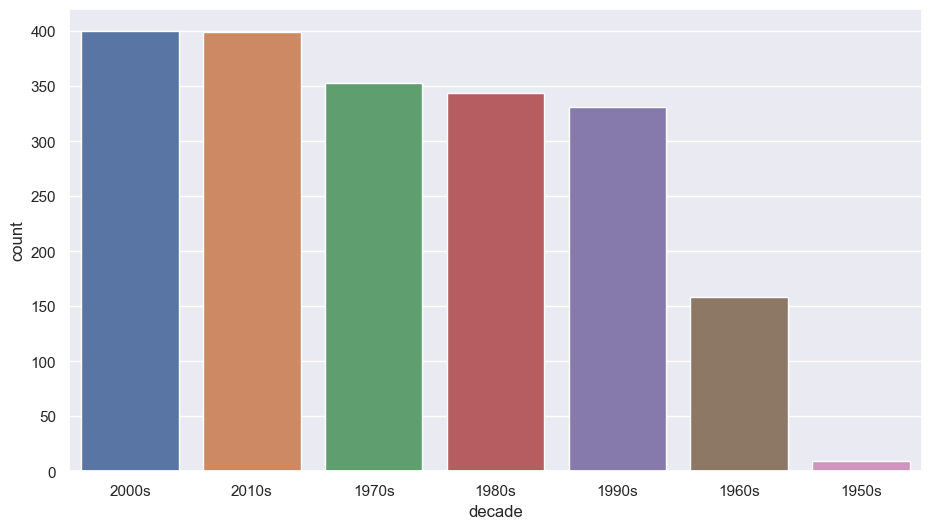

In [15]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['Year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data['decade']);

In [16]:
data_year =  pd.pivot_table(data, values=['Acousticness', 'Beats Per Minute (BPM)', 'Loudness (dB)',
                                          'Length', 'Liveness', 'Valence'], index='Year', aggfunc='mean')
data_year.reset_index(inplace=True)

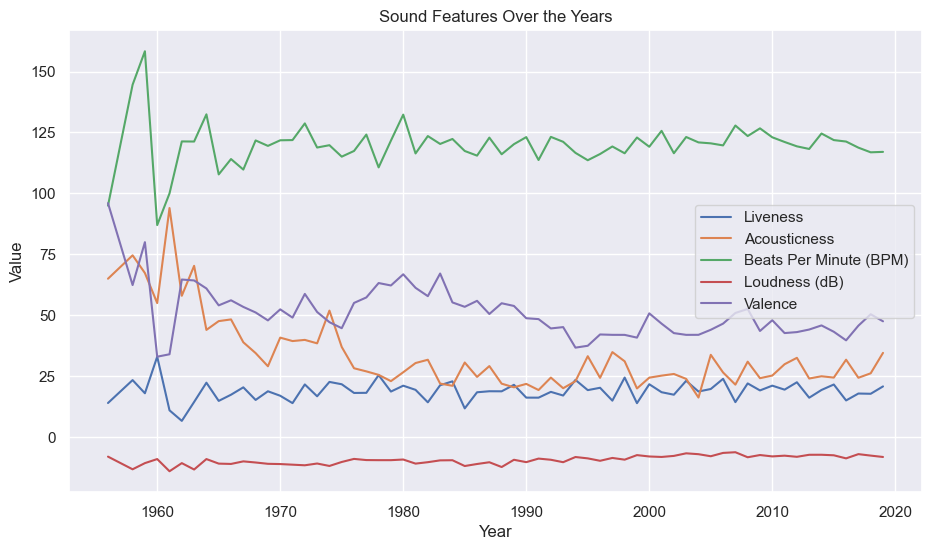

In [17]:
plt.plot(data_year['Year'], data_year['Liveness'], label='Liveness')
plt.plot(data_year['Year'], data_year['Acousticness'], label='Acousticness')
plt.plot(data_year['Year'], data_year['Beats Per Minute (BPM)'], label='Beats Per Minute (BPM)')
plt.plot(data_year['Year'], data_year['Loudness (dB)'], label='Loudness (dB)')
plt.plot(data_year['Year'], data_year['Valence'], label='Valence')

plt.title('Sound Features Over the Years')
plt.xlabel('Year')
plt.ylabel('Value')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# K-means clustering

In [18]:
from sklearn.cluster import KMeans

In [19]:
data2 = data[["Beats Per Minute (BPM)", "Loudness (dB)", 
              "Liveness", "Valence", "Acousticness", 
              "Speechiness","Energy"]]

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data2)
data2 = pd.DataFrame(scaled_data, columns=data2.columns)

In [21]:
data2.head()

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Energy
0,0.710059,0.52,0.092784,0.677083,0.949495,0.018868,0.278351
1,0.579882,0.64,0.154639,0.812500,0.171717,0.094340,0.783505
2,0.775148,0.72,0.051546,0.510417,0.020202,0.283019,0.680412
3,0.804734,0.92,0.010309,0.354167,0.000000,0.037736,0.958763
4,0.408284,0.88,0.082474,0.875000,0.010101,0.018868,0.814433


In [22]:
k_values = range(1, 10)

costs = []
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data2)
    costs.append(kmeans.inertia_)

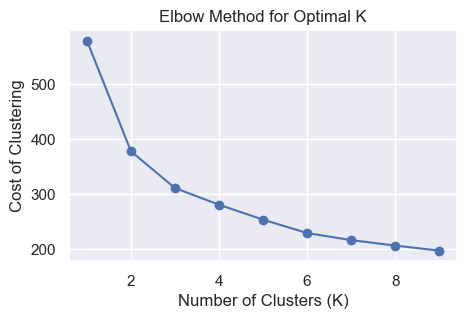

In [23]:
# plot the cost of clustering vs. K
plt.figure(figsize=(5, 3))
plt.plot(k_values, costs, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost of Clustering')
plt.title('Elbow Method for Optimal K')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=9)
clusters = kmeans.fit_predict(data2)

# Plotting the Clusters

In [30]:
import plotly.graph_objects as go

In [31]:
data["Music Segments"] = clusters
MinMaxScaler(data["Music Segments"])
data["Music Segments"] = data["Music Segments"].map({1: "Cluster 1", 2: 
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5", 
    6: "Cluster 6",7: "Cluster 7",8: "Cluster 8"})

In [32]:
data["Music Segments"].value_counts()

Cluster 8    313
Cluster 6    305
Cluster 4    233
Cluster 5    225
Cluster 2    211
Cluster 1    205
Cluster 3    160
Cluster 7    105
Name: Music Segments, dtype: int64

In [33]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(data["Music Segments"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = data[data["Music Segments"]== i]['Beats Per Minute (BPM)'],
                                y = data[data["Music Segments"] == i]['Energy'],
                                z = data[data["Music Segments"] == i]['Danceability'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='Beats Per Minute (BPM): %{x} <br>Energy: %{y} <br>Danceability: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Beats Per Minute (BPM)', titlefont_color = 'black'),
                                yaxis=dict(title = 'Energy', titlefont_color = 'black'),
                                zaxis=dict(title = 'Danceability', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

# Recommender

In [35]:
data['Top Genre'].value_counts()

album rock           413
adult standards      123
dutch pop             88
alternative rock      86
dance pop             83
                    ... 
streektaal             1
indie anthem-folk      1
la pop                 1
ccm                    1
bebop                  1
Name: Top Genre, Length: 149, dtype: int64

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
vector = cv.fit_transform(data['Top Genre']).toarray()

In [37]:
vector.shape

(1994, 125)

In [38]:
vector_df = pd.DataFrame(vector)
vector_df["Title"] = data['Title']
data2 = data2.reset_index(drop=True)
data3 = pd.concat([data2, vector_df], axis=1)

In [39]:
data3.head()

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Energy,0,1,2,...,116,117,118,119,120,121,122,123,124,Title
0,0.710059,0.52,0.092784,0.677083,0.949495,0.018868,0.278351,0,0,1,...,0,1,0,0,0,0,0,0,0,Sunrise
1,0.579882,0.64,0.154639,0.812500,0.171717,0.094340,0.783505,0,0,0,...,0,0,0,0,0,0,0,0,0,Black Night
2,0.775148,0.72,0.051546,0.510417,0.020202,0.283019,0.680412,0,0,0,...,0,0,0,0,0,0,0,0,0,Clint Eastwood
3,0.804734,0.92,0.010309,0.354167,0.000000,0.037736,0.958763,0,0,0,...,0,0,0,0,0,0,0,0,0,The Pretender
4,0.408284,0.88,0.082474,0.875000,0.010101,0.018868,0.814433,0,0,0,...,0,0,0,0,0,0,0,0,0,Waitin' On A Sunny Day


In [40]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(data2)

In [41]:
similarity.shape

(1994, 1994)

In [42]:
data3[data3['Title'] == 'Clint Eastwood'].index[0]

2

In [43]:
def recommend(song):
    index = data3[data3['Title'] == song].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(data3.iloc[i[0]].Title)

In [44]:
recommend('Clint Eastwood')

Hollereer
Stressed Out
Ziggy Stardust - 2012 Remaster
When The Sun Goes Down
Man Down
